<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/PyTorch_Hub_with_DEEPLABV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

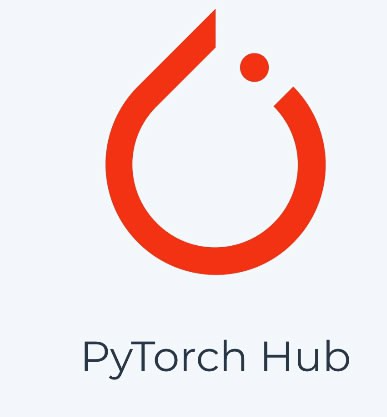

#DEEPLAB with image sigmentation

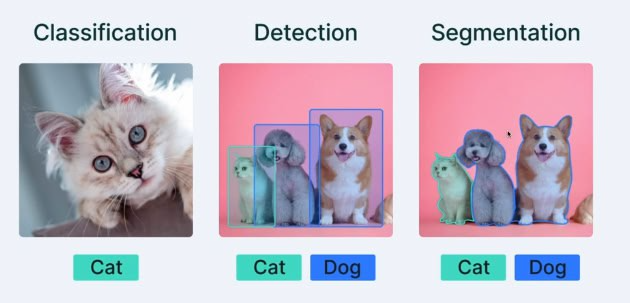

https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_mobilenet_v3_large', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 113MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
def preprocess_image(image_path,target_size=(256,256)):
  # Define the transformations for preprocessing
  preprocess_transform = transforms.Compose([
      # transforms.Resize(target_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  # Open the image using PIL(Python Imaging Library)
  image = Image.open(image_path).convert('RGB')
  # Apply the preprocessing transform
  input_tensor = preprocess_transform(image)
  # Add a batch dimension
  input_batch = input_tensor.unsqueeze(0)
#cpu ishlatsa
  # input_batch = input_batch.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
  return input_batch

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/fivecars.webp

--2025-02-01 11:11:18--  https://raw.githubusercontent.com/Davron030901/OpenCv/main/image/fivecars.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368200 (360K) [image/webp]
Saving to: ‘fivecars.webp’

fivecars.webp       100%[===================>] 359.57K  --.-KB/s    in 0.05s   

2025-02-01 11:11:19 (7.75 MB/s) - ‘fivecars.webp’ saved [368200/368200]



In [ ]:
input_tensor = preprocess_image('fivecars.webp')

In [ ]:
print(input_tensor.shape)

torch.Size([1, 3, 1060, 1590])


In [ ]:
output= model(input_tensor)

In [ ]:
output_pred=output['out'][0].argmax(0)

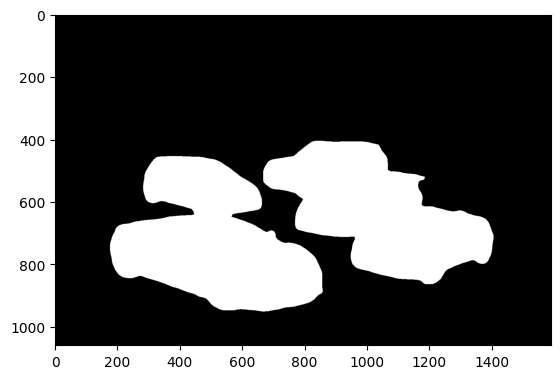

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(output_pred,cmap='gray')
plt.show()